In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

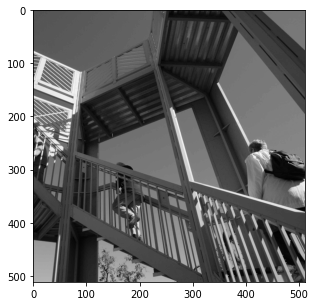

In [2]:
# Choose an image to play with
img = misc.ascent()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray');

In [3]:
img.shape

(512, 512)

In [4]:
# Reshape the image into a 4-d tensor.
img_tensor = img.reshape((1, 512, 512, 1))
img_tensor.shape

(1, 512, 512, 1)

In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.initializers import Constant, RandomNormal
from tensorflow.keras.models import Sequential

In [6]:
# Define a filter
arr = [
        [
            [[-1, -1]],
            [[0, 0]],
            [[0, 0]],
        ],
        [
            [[0, 0]],
            [[-1, -1]],
            [[0, 0]],
        ],
        [
            [[0, 0]],
            [[0, 0]],
            [[-1, -1]],
        ],
    ]
custom_filter = np.array(arr)
custom_filter.shape

(3, 3, 1, 2)

In [7]:
model = Sequential()
model.add(Conv2D(2, (3, 3), kernel_initializer=Constant(value=(custom_filter)), input_shape=(512, 512, 1)))

model.compile('adam', 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 2)       20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [8]:
img_pred_tensor = model.predict(img_tensor / 255)
img_pred_tensor.shape
# last number indicates # of filters
# (images, height, width, filters)

(1, 510, 510, 2)

In [9]:
filter_0 = img_pred_tensor[:, :, :, 0]
filter_0.shape

(1, 510, 510)

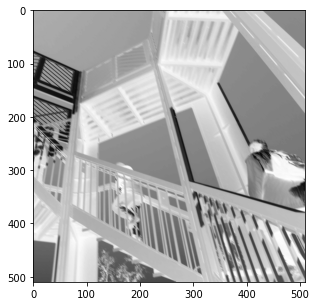

In [10]:
# Plot the filtered image
img = filter_0.reshape(510, 510)
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray');

In [11]:
# Confirm that the filter was applied.
# # https://stackoverflow.com/questions/49809850/conv2d-how-can-i-get-the-values-of-each-filter
model.layers[0].get_weights()

[array([[[[-1., -1.]],
 
         [[ 0.,  0.]],
 
         [[ 0.,  0.]]],
 
 
        [[[ 0.,  0.]],
 
         [[-1., -1.]],
 
         [[ 0.,  0.]]],
 
 
        [[[ 0.,  0.]],
 
         [[ 0.,  0.]],
 
         [[-1., -1.]]]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [12]:
model.layers[0].get_weights()[0].shape
# filter shape: 3 x 3 x 1

(3, 3, 1, 2)